In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
dfm = pd.read_csv('mcs.csv',encoding = 'UTF-8')
dfp = pd.read_csv('pes.csv',encoding = 'UTF-8')
dft = pd.read_csv('tbs.csv',encoding = 'UTF-8')

In [26]:
dft

,Unnamed: 0,Unnamed: 0.1,TweetID,Message,Source,Reply to User,User ID,User Name,Post Location,Follower Amount,Friends Amount,Total Tweets Amount,Account Start From,User Favorite Amount,Verified,User Language,Retweet Amount,Tweet Favorite Amount,Tweet Language,sentiment
0,0,0.0,1054885156354433025,RT @chrismelberger: taco bell my ass\...,Twitter for Android,None,3031070389,nye_lucas,NaN,81.0,532.0,0,2015-02-19 18:14:48,3272.0,False,en,619.0,0.0,en,-0.150000
1,1,1.0,1054885096627585025,RT @BiPolar_Kayy_: Did someone wanna come brin...,Twitter for iPhone,None,183904300,BiPolar_Kayy_,With Yeezus,1735.0,1427.0,12,2010-08-28 04:54:10,23147.0,False,en,1.0,0.0,en,0.000000
2,2,2.0,1054885081347776512,And taco bell ...,Twitter for Android,None,903626421830127616,vannessaaram,"New Jersey, USA",26.0,36.0,0,2017-09-01 14:31:42,2557.0,False,en,0.0,0.0,en,0.000000
3,3,3.0,1054885064906039299,I’m at a Taco Bell where they serve anti hero....,Twitter for iPhone,None,1623227862,AleutianJones22,"Uptown, Chicago",1345.0,2176.0,79,2013-07-26 15:47:13,48470.0,False,en,0.0,0.0,en,-0.250000
4,4,4.0,1054884996090081280,@JaimsVanDerBeek Have the Doritos Locos taco a...,Twitter for Android,JaimsVanDerBeek,899298546993811456,DROwens901,"Wynne, AR",197.0,430.0,0,2017-08-20 15:54:16,8022.0,False,en,0.0,1.0,en,0.000000
5,5,5.0,1054884985872834560,RT @chrismelberger: taco bell my ass\...,Twitter for iPhone,None,922509484353904646,st_beks,"Grand Rapids, MI",10.0,40.0,0,2017-10-23 17:06:15,681.0,False,en,619.0,0.0,en,-0.150000
6,6,6.0,1054884906751410176,i keep thinking about the time me and haylee w...,Twitter for iPhone,None,2424362244,tay_leathers,"Madison, OH",219.0,262.0,0,2014-04-02 21:33:26,13139.0,False,en,1.0,2.0,en,-0.100000
7,7,7.0,1054884900644548609,RT @chrismelberger: taco bell my ass\...,Twitter for iPhone,None,34545233,mooninitetwo,"Worcester, MA",51.0,399.0,0,2009-04-23 05:38:50,7341.0,False,en,619.0,0.0,en,-0.150000
8,8,8.0,1054884841257340928,True love is.... Your boyfriend going to get y...,Twitter for iPhone,None,1123918112,KaylinV1497,NaN,48.0,111.0,0,2013-01-27 04:00:36,802.0,False,en,0.0,2.0,en,0.425000
9,9,9.0,1054884803776921600,RT @chrismelberger: taco bell my ass\...,Twitter for iPhone,None,883570718,GotHeem7,NaN,240.0,202.0,4,2012-10-16 03:01:20,1355.0,False,en,619.0,0.0,en,-0.150000


Text(0,0.5,'Density')

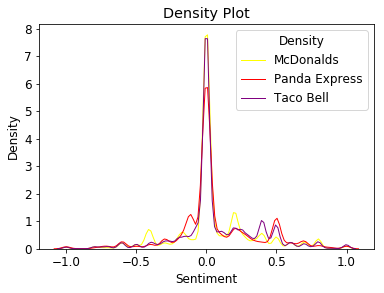

In [12]:
#Density plot
sns.distplot(dfm['sentiment'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1}, color = 'yellow',
                 label = 'McDonalds')
sns.distplot(dfp['sentiment'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1}, color = 'red',
                 label = 'Panda Express')
sns.distplot(dft['sentiment'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1}, color = 'purple',
                 label = 'Taco Bell')
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Density')
plt.title('Density Plot')
plt.xlabel('Sentiment')
plt.ylabel('Density')

In [6]:
#Welch t-test
from __future__ import division
from collections import namedtuple

import numpy as np
import scipy.stats as st

TtestResults = namedtuple("Ttest", "T p")

def t_welch(x, y, tails=2):
    """Welch's t-test for two unequal-size samples, not assuming equal variances
    """
    assert tails in (1,2), "invalid: tails must be 1 or 2, found %s"%str(tails)
    x, y = np.asarray(x), np.asarray(y)
    nx, ny = x.size, y.size
    vx, vy = x.var(), y.var()
    df = int((vx/nx + vy/ny)**2 / # Welch-Satterthwaite equation
        ((vx/nx)**2 / (nx - 1) + (vy/ny)**2 / (ny - 1)))
    t_obs = (x.mean() - y.mean()) / np.sqrt(vx/nx + vy/ny)
    p_value = tails * st.t.sf(abs(t_obs), df)
    return TtestResults(t_obs, p_value)


In [8]:
t_welch(dfm['sentiment'],dfp['sentiment'],tails=2)

Ttest(T=-3.1524084888138453, p=0.0016251043379853613)

In [9]:
t_welch(dfm['sentiment'],dft['sentiment'],tails=2)

Ttest(T=-9.016611728780147, p=2.0473452084739004e-19)

In [10]:
t_welch(dft['sentiment'],dfp['sentiment'],tails=2)

Ttest(T=2.5093552111017288, p=0.01211760344025632)

In [12]:
stats.f_oneway(dfm['sentiment'],dfp['sentiment'],dft['sentiment'])

F_onewayResult(statistic=40.10160442804097, pvalue=3.980224014185495e-18)

In [18]:
dfm.verified.value_counts()

False    14528
True       237
Name: verified, dtype: int64

In [31]:
dfp.verified.value_counts()

False    4938
True       50
Name: verified, dtype: int64

In [33]:
dft.Verified.value_counts()

False    23925
True       430
Name: Verified, dtype: int64

In [23]:
mv = dfm[dfm['verified'] == True]
mu = dfm[dfm['verified'] == False]
stats.f_oneway(mv['sentiment'],mu['sentiment'])

F_onewayResult(statistic=0.5521465563778076, pvalue=0.45745376040880503)

In [24]:
pv = dfp[dfp['verified'] == True]
pu = dfp[dfp['verified'] == False]
stats.f_oneway(pv['sentiment'],pu['sentiment'])

F_onewayResult(statistic=0.21245108980537056, pvalue=0.6448731144961045)

In [27]:
tv = dft[dft['Verified'] == True]
tu = dft[dft['Verified'] == False]
stats.f_oneway(tv['sentiment'],tu['sentiment'])

F_onewayResult(statistic=13.24200278831166, pvalue=0.0002743111240725325)

In [28]:
t_welch(mv['sentiment'],mu['sentiment'],tails=2)

Ttest(T=0.6782815024121729, p=0.4982412796593255)

In [29]:
t_welch(pv['sentiment'],pu['sentiment'],tails=2)

Ttest(T=-0.5778018018429302, p=0.565991108421478)

In [30]:
t_welch(tv['sentiment'],tu['sentiment'],tails=2)

Ttest(T=3.8824436787830234, p=0.00011904925610544094)

In [3]:
dft.columns = dfm.columns 

In [14]:
dft[['followers_count','friends_count','listed_count','fav_counts','verified','retweet_count','favorite_count','sentiment']].corr()

,followers_count,friends_count,fav_counts,retweet_count,favorite_count,sentiment
followers_count,1.000000,0.104591,0.002804,-0.002980,0.043890,0.013697
friends_count,0.104591,1.000000,0.150419,-0.006466,0.003864,0.014901
fav_counts,0.002804,0.150419,1.000000,0.004723,0.020164,-0.020345
retweet_count,-0.002980,-0.006466,0.004723,1.000000,0.001578,-0.034955
favorite_count,0.043890,0.003864,0.020164,0.001578,1.000000,0.002429
sentiment,0.013697,0.014901,-0.020345,-0.034955,0.002429,1.000000


In [18]:
dft.count()

Unnamed: 0           24363
Unnamed: 0.1         24359
id                   24363
text                 24363
source               24363
reply_screen_name    24363
user_id              24363
user_screen_name     24363
user_location        17322
followers_count      24359
friends_count        24359
listed_count         24359
user_created_at      24355
fav_counts           24355
verified             24355
user_lang            24355
retweet_count        24355
favorite_count       24355
lang                 24355
sentiment            24363
dtype: int64

In [6]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS



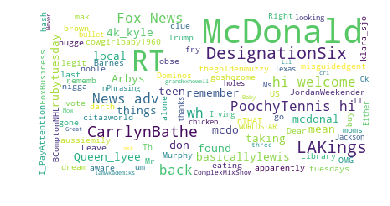

In [27]:
#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, #contour_width=3, contour_color='steelblue',
                          random_state=42
                         ).generate(str(dfm['text']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=5000)

In [11]:
c1 = 0
c2 = 0
c3 = 0
for i in range(len(dft['sentiment'])):
    if dft['sentiment'][i] > 0:
        c1 += 1
    if dft['sentiment'][i] == 0:
        c2 += 1
    if dft['sentiment'][i] < 0:
        c3 += 1

In [12]:
print(c1,c2,c3)

9111 10520 4732


In [13]:
print(round(c1/len(dft['sentiment']),3),round(c2/len(dft['sentiment']),3),round(c3/len(dft['sentiment']),3))

0.374 0.432 0.194


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,source,reply_screen_name,user_id,user_screen_name,user_location,...,listed_count,user_created_at,fav_counts,verified,user_lang,retweet_count,favorite_count,lang,sentiment,State
0,0,0,0,1054885176499732481,@4k_kyle @McDonalds I’m aware and no I don’t,Twitter for iPhone,4k_kyle,898768076455518208,Queen_lyee,McDonalds 🍟,...,6,2017-08-19 04:46:22,3071,False,en,0,0,en,0.250000,-
1,1,1,1,1054885134577557506,@BComptonNHL @McDonalds OMG. THEY JUST GET US.,Twitter for iPhone,BComptonNHL,16052886,CarrlynBathe,"Orange, CA",...,200,2008-08-30 09:02:03,14832,True,en,0,2,en,0.000000,CA
2,2,2,2,1054885107096383488,RT @misguidedgent: Not eating that fry at the ...,Twitter for iPhone,NaN,1045440780192497664,Artemis_Ascends,The Sea of Tranquility,...,20,2018-09-27 22:31:20,10322,False,en,36,0,en,0.000000,-
3,3,3,3,1054885057809260545,@Queen_lyee @McDonalds um that’s not my last n...,Twitter for iPhone,4k_kyle,3304215825,4k_kyle,"Blythewood, SC",...,0,2015-05-31 01:43:24,920,False,en,0,0,en,0.000000,SC
4,4,4,4,1054885057729458176,@thegoldenmuzzy @McDonalds @LAKings Right?! Th...,Twitter for iPhone,thegoldenmuzzy,16052886,CarrlynBathe,"Orange, CA",...,200,2008-08-30 09:02:03,14832,True,en,0,1,en,0.053571,CA
5,5,5,5,1054885050439909376,RT @JordanWeekender: So apparently the Dominos...,Twitter for iPhone,NaN,1599343927,KENZIFOWELL_X,NaN,...,0,2013-07-16 21:35:03,13680,False,en-gb,279,0,en,0.275000,-
6,6,6,6,1054885029761957891,@CarrlynBathe @McDonalds @LAKings Did you get ...,Twitter for iPad,CarrlynBathe,18638403,michaelburgett,Tennessee,...,24,2009-01-05 17:44:13,12254,False,en,0,1,en,0.000000,TN
7,7,7,7,1054885026276433920,@aussiemily @McDonalds @LAKings I’m legit obse...,Twitter for iPhone,aussiemily,16052886,CarrlynBathe,"Orange, CA",...,200,2008-08-30 09:02:03,14832,True,en,0,1,en,-0.500000,CA
8,8,8,8,1054884963076718592,RT @darth: @McDonalds hash brown tuesdays mcdo...,Tweetbot for Mac,NaN,15560096,CrucialTK,"Frederick, MD",...,28,2008-07-23 11:49:49,291,False,en,72,0,en,0.000000,MD
9,9,9,9,1054884961470242816,RT @cowgirlbaby1960: @FoxBusiness @McDonalds A...,Twitter for iPhone,NaN,1312262570,cowgirlbaby1960,"Baton Rouge, LA",...,14,2013-03-29 01:39:20,10441,False,en,1,0,en,0.800000,LA
